# Machine learning

<img src="http://imgs.xkcd.com/comics/tasks.png">
<center>Image credit: xkcd</center>


<small><i>This notebook is inspired by and based on the excellent notebooks by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2015 (source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2015/)) and [Just Markham scikit video lecture](https://github.com/justmarkham/scikit-learn-videos).</i></small>

## What you will learn today
- **Basics in Machine Learning**, and some skills useful in practice.
- **Scikit-learn** a Python library for machine learning


# What is machine learning?


A high level definition is:

*"Machine learning is the semi-automated extraction of knowledge from data"*  (Just Markham)

* Knowledge from data: Starts with a question that might be answerable using data
* Automated extraction: A computer provides the insight
* Semi-automated: Requires many smart decisions by a human

## Two categories of learning

### Supervised learning: Making predictions using data

In supervised learning, the machine learns from data with known output (**labels**, **targets**).

Examples:
<div style="display:flex;width:100%">
    <div style="width:50%">
Classification:
<img src="images/classification.png" width=200px>
Example: email spam recognition
    </div>
        <div>
Regression: 

<img src="images/linear_regression.png" width=200px>
Example: Life expectancy as a function of weight and height.
        </div>
<div />

### Unsupervised learning: Extracting structure from data
In unsupervised learning, the machine learns from data without data labels.

* **Clustering of data**

<img src="images/clustering.png" width=300px>

## Is it supervised or unsupervised learning?

Which of these tasks are supervised and which are unsupervised?
<div class="boxed" style="border: 1px solid green ;">
Given a photograph of a person, identify the person in the photo.
</div>
<br/>
<br/>
<!--Supervised (classification)-->
<div class="boxed" style="border: 1px solid green ;">
Given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like.
</div>
<br/>
Answering this question was worth US$1,000,000 in 2009: [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)
<br/>
<!--Supervised (regression)-->
<div class="boxed" style="border: 1px solid green ;">
Given a mixture of two sound sources (for example, a person talking over some music), separate the two (blind source separation problem).
</div>
<br/>
<br/>
<!--Unsupervised-->
<div class="boxed" style="border: 1px solid green ;">
Given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
</div>
<br/>
<br/>
<!--Unsupervised-->


## How does machine learning work?


#### Supervised learning

Supervised learning consists of two steps:

1. **Model training**: Model is learning the relationship between data and outcome from existing **labeled data** (data with known outcome).
2. **Prediction of new data**: The model can predict the outcome for new data.

<img src="images/plot_ML_flow_chart_1.png" width=400px alt="source: wikipedia">


Important choices when designing :
    
* Which **features** should be used to train my model?
* Which **machine learning algorithm** to use?
* **Evaluate the quality** of the prediction model. 

# Scikit-Learn: Machine Learning with Python

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python module which implements many well-known machine learning algorithms.

**Advantages:**
* all algorithms accessible from a consistent interface
* open-source, large community
* sensible defaults settings
* good documention
* built on numpy and scipy

**Disadvantages:**
* not optimized for very large datasets
* specialised algorithms might not be implemented (yet)

## Installing scikit-learn

If you use anaconda or [miniconda](http://conda.pydata.org/miniconda.html) install with:
```
$ conda install scikit-learn
```

If you have do not use anaconda, use instead `pip`:
```
$ pip install scikit-learn
```

Check versions of the packages with:

In [1]:
import sklearn
sklearn.__version__

'1.6.1'

We will also use matplotlib:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

## Useful Resources

- **scikit-learn:** http://scikit-learn.org (see especially the narrative documentation)
- **matplotlib:** http://matplotlib.org (see especially the gallery section)
- **pandas:** http://pandas.pydata.org (high-performance, easy-to-use data structures and data analysis tools for Python

## Representation of Data in scikit-learn

Machine learning is about creating models from data. Therefore we need to know how to represented the data in order to be understood by the computer. 

1. `scikit-learn` expect data to be stored in a **two-dimensional array or matrix**.  
1. The array should be a ``numpy`` array.
1. The size must be `[n_samples, n_features]`. 
    - **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
      A sample can be a document, a picture, a sound, a video, an astronomical object,
      a row in database or CSV file,
      or whatever you can describe with a fixed set of quantitative traits.
    - **n_features:**  The number of features or distinct traits that can be used to describe each
      item in a quantitative manner.  Features are generally real-valued, but may be boolean or
      discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. For high dimensional, sparse data, use ``scipy.sparse`` matrices instead of `numpy.array`.

## A first example: Predicting the Iris flower

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

<div>
<img src="images/iris_setosa.jpg" style="display: inline-block; height:200px">
<img src="images/iris_versicolor.jpg" style="display: inline-block;height:200px">
<img src="images/iris_virginica.jpg" style="display: inline-block;height:200px">
</div>
Iris Setosa (left), Iris Versicolor (middle), Iris Virginica (right)

Goal: Predict the species of an Iris using the measurements

This is a **supervised machine learning** task. The iris dataset is famous for machine learning because prediction is relatively easy.

### Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of (numeric) features for each sample, and feature must be a similar kind of quantity for each sample.

(One) solution: 


<img src="https://github.com/justmarkham/scikit-learn-videos/raw/84f03ae1d048482471f2a9ca85b0c649730cc269/images/03_iris.png">

### Loading the Iris Data with Scikit-Learn

``scikit-learn`` includes a copy of the iris data set:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()

 The data consist of
the following:
- Features in the Iris dataset:
 1. sepal (hanging leaf) length in cm
 2. sepal (hanging leaf) width in cm
 3. petal (standing leaf) length in cm
 4. petal (standing leaf) width in cm

- Target labels to predict:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let's inspect the dataset in detail. 

`iris['data']` contains the sample data:

In [5]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Let's see how much data we have:

In [6]:
iris['data'].shape

(150, 4)

Each row represents one flower sample. The meaning of each column is listed in `iris['feature_names']`:

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

`iris['targets']` contains the the target id for each sample:

In [8]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


`iris['target_names']` contains the descriptive name for each labels:

In [9]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


**Summary**

For training the machine we will use the following data:

* `iris[data]`:  150 samples with 4 features each
* `iris[target]`:150 labels with 3 label types (*targets*)

This data is four dimensional, but we can visualize two of the dimensions
at a time using a scatter-plot:

C:\Users\58263\AppData\Local\Temp\ipykernel_31076\1295746911.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


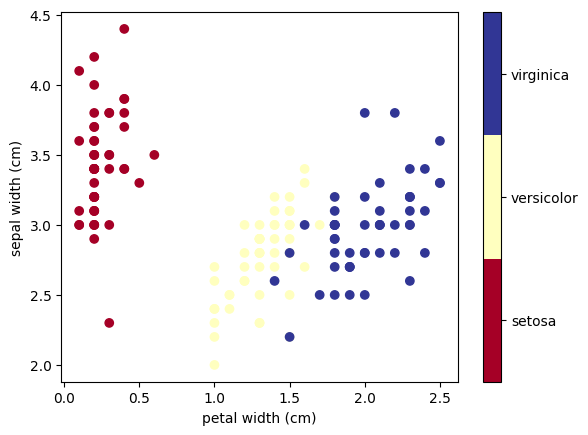

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# the two dimensions to use in the plot. Here petal width (x) vs sepal width (y)
x_index = 3
y_index = 1


plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## Training the model

The setup:
* 150 observations
* 4 features (sepal length, sepal width, petal length, petal width)
* Label is the iris species
* Classification problem

## K-nearest neighbors (KNN) classification 

**KNN algorithm**

*Input*: New iris features. 

*Out*: Iris target

* Pick a value for K.
* Search for the K neighbours in the sample data that are nearest to the new iris.
* Return the most popular target value from the K nearest neighbors.

**Dataset**
<br>
<img src="images/knn_1.png" alt="source:wikipedia" width="400px"> <br>
**1-Nearest neighbours classification** <br>
<img src="images/knn_2.png" alt="source:wikipedia" width="400px"> <br>
**5-Nearest neighbours classification** <br>
<img src="images/knn_3.png" alt="source:wikipedia" width="400px"> <br>
White areas consists of the points where the vote is tight (no most popular target value) <br>
<img src="images/overfitting_2.png" width="900px"> <br>
Example of underfitting, appropriate fitting and overfitting

## scikit-learn in 4 steps

**Step 1**: Import the class you plan to use

In [11]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2**: Instantiate an `Estimator`, scikit-learn's term for model.

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

We could tune the model by changing the default parameters.
All parameters not specified are set to their defaults

In [13]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3**: Model training, i.e. fit the model with data. Model is learning the relationship between iris.data and iris.target. This step occurs in-place.

In [14]:
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=1)

**Step 4**: Predict the response for a new observation. 
New observations are called "out-of-sample" data.
Uses the information it learned during the model training process

In [15]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:

knn.predict([[3, 5, 4, 2],])

array([2])

It returns a NumPy array. We can map this to the label name:

In [16]:
print(iris.target_names[_])

['virginica']



Can predict for multiple observations at once

In [17]:
iris_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(iris_new)

array([2, 1])

You can also do probabilistic predictions:

In [18]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0., 0., 1.]])

Or create a classification map:

In [19]:
from sklearn.datasets import make_blobs
from fig_code import plot_iris

[1]


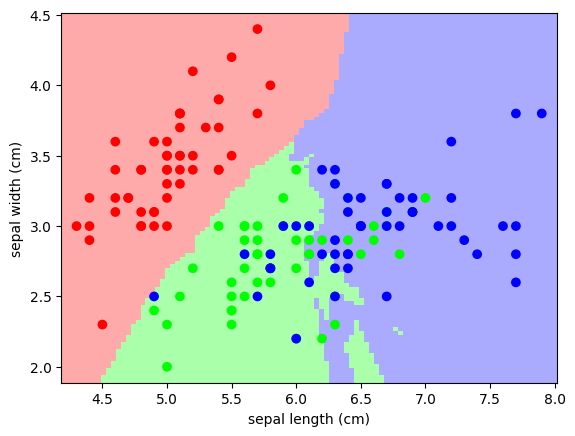

In [37]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(iris.data, iris.target)
pred = knn.predict([[3, 5, 4, 2],])
print(pred)

plot_iris(knn)

In [42]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn = KNeighborsClassifier(n_neighbors=1)
data = np.array([1, 1.1, 0.9, 2, 1.9, 2.1])
target = np.array([0,0,0,1,1,1])
knn.fit(data.reshape(-1,1), target)
pred = knn.predict_proba([[1.5],])
print(pred)

[[1. 0.]]


# Exercise

1) Run through the 4 steps of KNeighbors with the iris data

2) Vary the size of n_neighbors and inspect the results. 

3) Create your own data and target (e.g. data = [1, 1.1, 0.9, 2, 1.9, 2.1], target = [0,0,0,1,1,1]) and run predictions for a few numbers. For data with only 1 feature you might want to pass data.reshape(-1, 1) into the knn.fit -step.

4) What would you expect from knn.predict([[1.5],])? Try to think of it before testing the code. Also try to call knn.predict_proba on the same data point. 

5) Try with a different classifier (for instance SVC from sklearn.svm). You can find many more classifier under "classifier comparison" on scikit-learn.org (just google scikit learn classifier comparison). 

## Changing the value of K

We crate a new classifier, fit the data and perform the prediction:

In [43]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(iris.data, iris.target)

# predict the response for new observations
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array([1, 1])

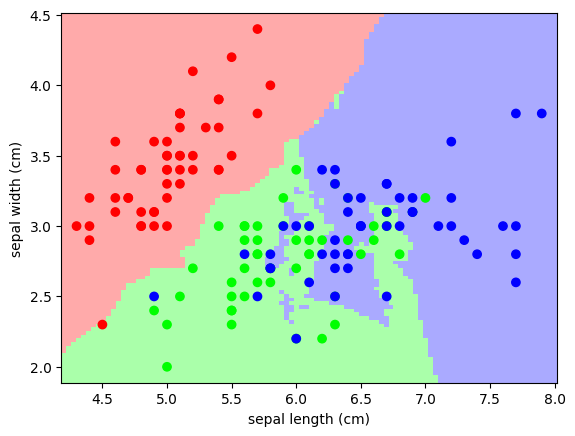

In [44]:
plot_iris(knn)

## Using a different Classification algorithm

In [45]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=200)

# fit the model with data
logreg.fit(iris.data, iris.target)

# predict the response for new observations
logreg.predict(iris_new)

array([0, 0])

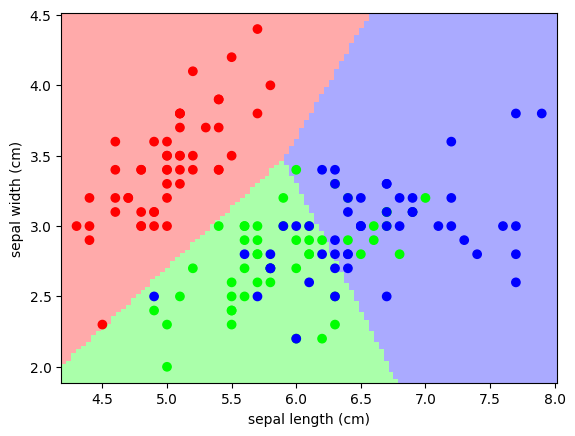

In [31]:
plot_iris(logreg)

## Flow Chart: How to Choose your Estimator

This is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference! https://scikit-learn.org/1.3/tutorial/machine_learning_map/

<img src="http://scikit-learn.org/dev/_static/ml_map.png">

# Exercise
In this exercise, you will hard-code the KNearest Neighbor algorithm. 

Consider the data points <br>
`data = array([[1,1], [1,0], [0.4,0.8], [2,5], [2,4], [2.2, 4.6]])` with targets: <br>
`targets = array([0,0,0,1,1,1]`

1) To display our data, let the target correspond to the colors ['blue', 'red'] and plot each data-point in the xy-plane with the correct color

2) Make a function `distance(p0, P1)` that returns the (Eucledian) distance between a point p0 (the point to predict) to each point in the array of points P1 (the data). Calling e.g. `distance(array([1,1]),array([[1,2],[2,2]])` should return [1, sqrt(2)] 

Now set `p_pred = array([1.75, 2])` as a point we would like to predict the color of

3) Make a sorted list of the distance between the data-points and the point to predict (p_pred). Now you should find out what colors the closest points are. Set n as an adjustable parameter and find the color of the n closest points. (hint: numpy argsort could be useful)

4) Let the n closest points give their vote on what the predicted target (and thus color) should be (bincount, and argmax could be useful)

5) Compare the result from your code with  

```from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(data, targets)
knn.predict([p_pred,])
```

And play around with the value of n. 


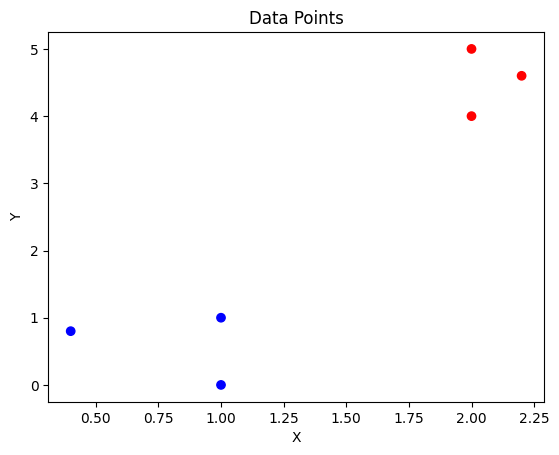

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Plot data points
data = np.array([[1, 1], [1, 0], [0.4, 0.8], [2, 5], [2, 4], [2.2, 4.6]])
targets = np.array([0, 0, 0, 1, 1, 1])
colors = ['blue' if t == 0 else 'red' for t in targets]

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.title("Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


<img src="https://www.gstatic.com/education/formulas2/553212783/en/euclidean_distance.svg" />

In [26]:
# Step 2: Create distance function
def distance(p0, P1):
    return np.sqrt(np.sum((P1 - p0)**2, axis=1))

distance(np.array([1, 1]), np.array([[1,2],[2,2]]))

array([1.        , 1.41421356])

In [27]:
# Step 3: Find closest points
p_pred = np.array([1.75, 2])
n = 3  # adjustable parameter

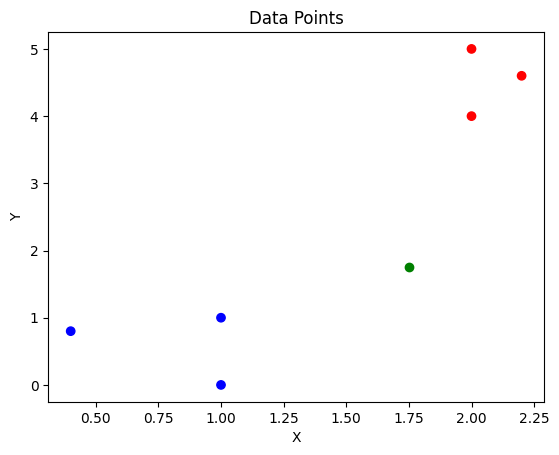

In [28]:
data = np.array([[1, 1], [1, 0], [0.4, 0.8], [2, 5], [2, 4], [2.2, 4.6]])
targets = np.array([0, 0, 0, 1, 1, 1])
colors = ['blue' if t == 0 else 'red' for t in targets]

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.scatter(p_pred[0], p_pred[0], c="green")
plt.title("Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [29]:
distances = distance(p_pred, data)
closest_n_indices = []
for i in range(n):
    min_index = np.argmin(distances)
    closest_n_indices.append(min_index)
    distances[min_index] = float('inf')  # set to inf to avoid picking it again

closest_n_colors = [targets[i] for i in closest_n_indices]

closest_n_colors

[0, 0, 1]

In [30]:
# Step 4: Voting
votes = {0: 0, 1: 0}
for color in closest_n_colors:
    votes[color] += 1

predicted_target = max(votes, key=votes.get)

# Step 5: Compare with sklearn
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(data, targets)
sklearn_prediction = knn.predict([p_pred,])

print(f"Manual KNN Prediction: {predicted_target}")
print(f"Sklearn KNN Prediction: {sklearn_prediction[0]}")

Manual KNN Prediction: 0
Sklearn KNN Prediction: 0


## Evaluating the performance of a prediction

Evaluating the performane of a prediction is crucial in order to:
* choose which model to use for my supervised learning task;
* cchoose the best tuning parameters for that model;
* estimate the likely performance of my model on out-of-sample data;

## **Training accuracy**: Train and test on the entire dataset

The following approach is used to compute **training accucarcy**:
     
1. Train the model on the entire dataset.
1. Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values.

In [46]:
logreg = LogisticRegression(max_iter=200)

# fit the model with data
logreg.fit(iris.data, iris.target)
pred = logreg.predict(iris.data)

scikit provides the function `metrics.accuracy_score` to compute the **training accuracy**:

In [47]:
from sklearn import metrics
metrics.accuracy_score(iris.target, pred)

0.9733333333333334

It tells us that we predicted 97% of the predicted samples with the correct label.

Let's test some more:

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris.data, iris.target)
pred_target = knn.predict(iris.data)
metrics.accuracy_score(iris.target, pred_target)

0.9666666666666667

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target)
pred_target = knn.predict(iris.data)
metrics.accuracy_score(iris.target, pred_target)

1.0

## Evaluation based on cross validation

Idea:
1. Split the sample dataset into two pieces: a training set and a testing set.
1. Train the model on the training set.
1. Test the model on the testing set, and evaluate the accuracy of the prediction.

### Step 1: Split data set into training and testing sets

`scikit` learn provides the function `train_test_split` to split up the saple test

In [50]:
from sklearn.model_selection import train_test_split

# Randomly split iris.data and iris.target into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=4)

Let's check what we got:

In [51]:
data_train.shape

(90, 4)

In [52]:
data_test.shape

(60, 4)

In [38]:
target_train.shape

(90,)

In [39]:
target_test.shape

(60,)

### Step 2: Fit model using training data

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train, target_train)

KNeighborsClassifier(n_neighbors=1)

### Step 3: Predict target values for testing values, evaluate performance

First we predict the target values for the test samples:

In [57]:
knn.predict(data_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1])

Then we evaluate the performance of the prediction:

In [58]:
metrics.accuracy_score(target_test, _)

0.95

#### We can now test the performance of the prediction for different classification algorithms

Text(0, 0.5, 'Testing Accuracy')

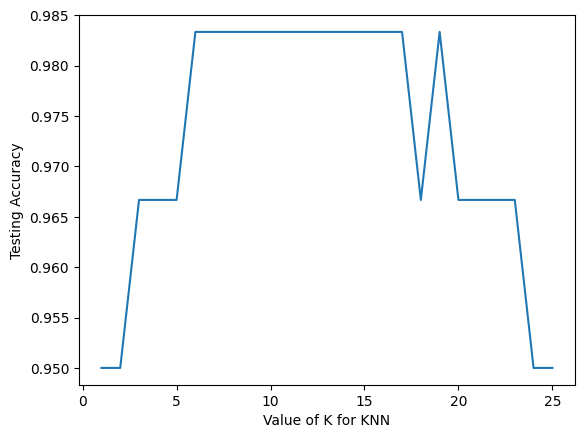

In [59]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, target_train)
    target_pred = knn.predict(data_test)
    scores.append(metrics.accuracy_score(target_test, target_pred))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Unsupervised Learning: Dimensionality Reduction and Clustering

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### Dimensionality Reduction: PCA

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


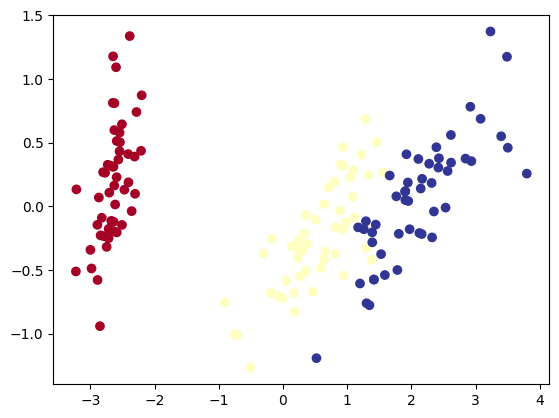

In [60]:
from sklearn.datasets import load_iris
iris = load_iris()

X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevant hidden structure of the data only if the criterion used highlights it.

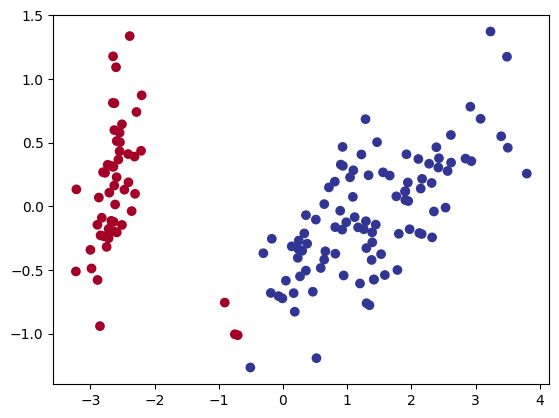

In [45]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

## Quick Application: Optical Character Recognition

To demonstrate the above principles on a more interesting problem, let's consider OCR (Optical Character Recognition) – that is, recognizing hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use scikit-learn's set of pre-formatted digits, which is built-in to the library.

### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [46]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

Let's plot a few of these:

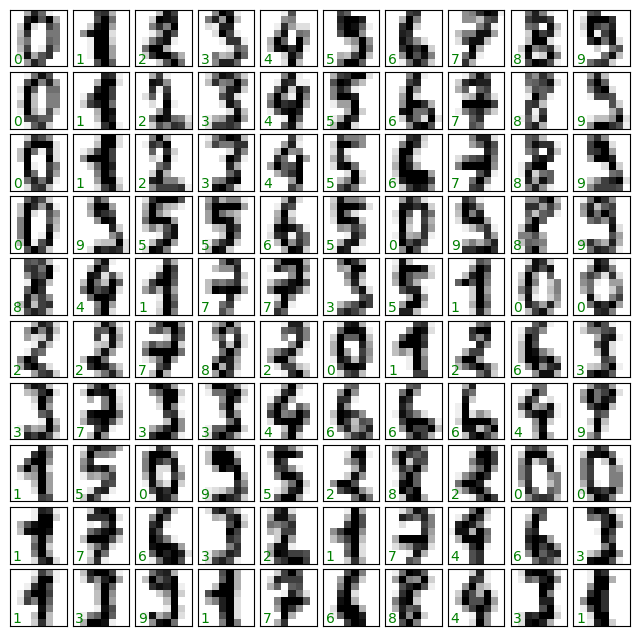

In [47]:
import matplotlib.pylab as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here the data is simply each pixel value within an 8x8 grid:

In [48]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [49]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [50]:
# The target label
print(digits.target)

[0 1 2 ... 8 9 8]


So our data have 1797 samples in 64 dimensions.

### Unsupervised Learning: Dimensionality Reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions!
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap*, and transform the data to two dimensions.

In [51]:
from sklearn.manifold import Isomap

In [52]:
iso = Isomap(n_components=2, n_neighbors=10)
data_projected = iso.fit_transform(digits.data)

In [53]:
data_projected.shape

(1797, 2)

C:\Users\58263\AppData\Local\Temp\ipykernel_33696\3930846026.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));


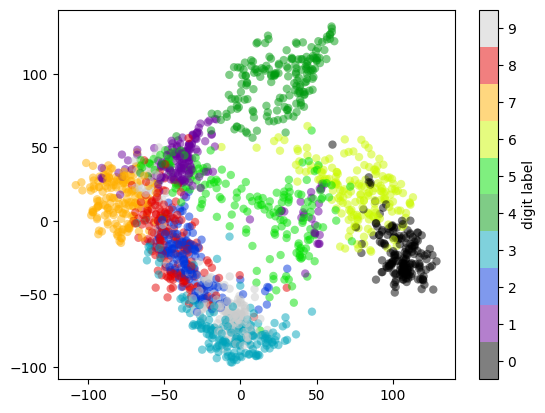

In [54]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. Let's give it a try.

### Classification on Digits

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [55]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Let's use a simple logistic regression which (despite its confusing name) is a classification algorithm:

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9444444444444444

This single number doesn't tell us **where** we've gone wrong: one nice way to do this is to use the *confusion matrix*

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  1  0  0  0  0  0  0 38  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


C:\Users\58263\AppData\Local\Temp\ipykernel_33696\1943477309.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred)),


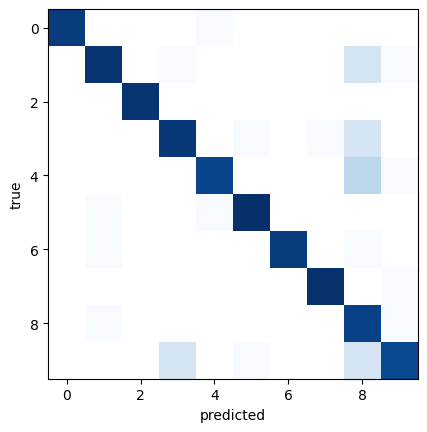

In [59]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

We might also take a look at some of the outputs along with their predicted labels. We'll make the bad labels red:

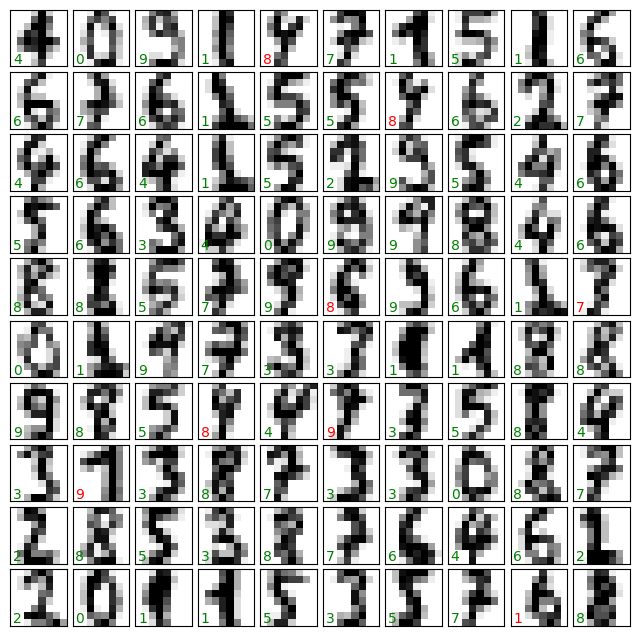

In [60]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier, but we're out of time here. To go further, we could use a more sophisticated model, use cross validation, or apply other techniques.